<a href="https://colab.research.google.com/github/zakyzuf/2141720173-machine-learning-2023/blob/main/UTS/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

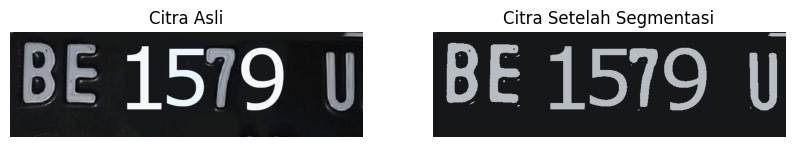

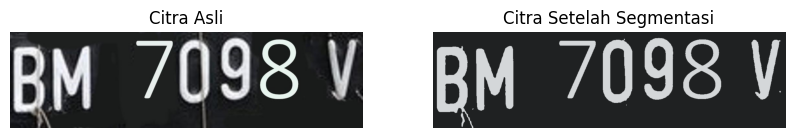

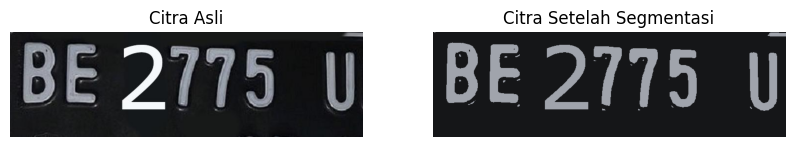

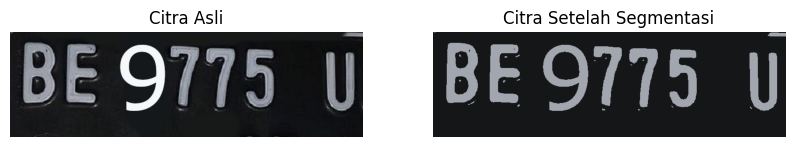

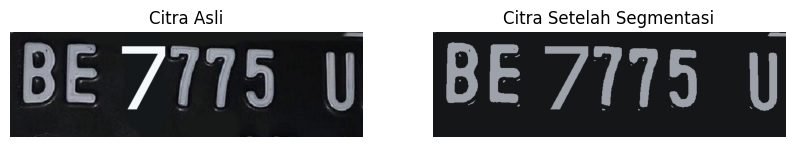

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Fungsi untuk segmentasi citra dengan algoritma K-Means
def kmeans_segmentation(image, k=2):
    vectorized = image.reshape((-1, 3))
    vectorized = np.float32(vectorized)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    attempts = 10
    ret, label, center = cv2.kmeans(vectorized, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    segmented_image = res.reshape((image.shape))

    return segmented_image

# Path ke folder yang berisi citra plat nomor
folder_path = 'zaky/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Menggunakan algoritma K-Means untuk segmentasi
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    segmented_image = kmeans_segmentation(image_rgb, k=2)

    # Menampilkan citra sebelum dan sesudah segmentasi
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Citra Setelah Segmentasi')
    plt.axis('off')

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


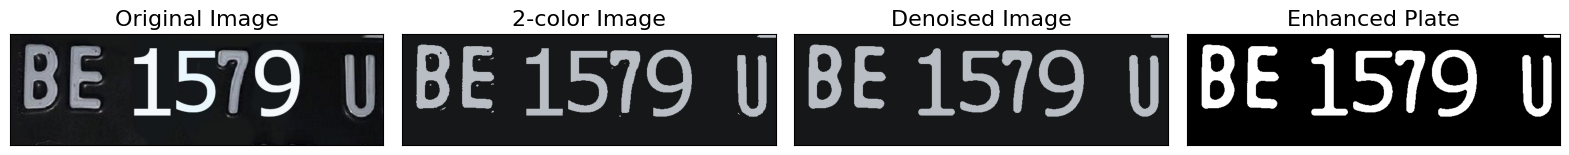

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


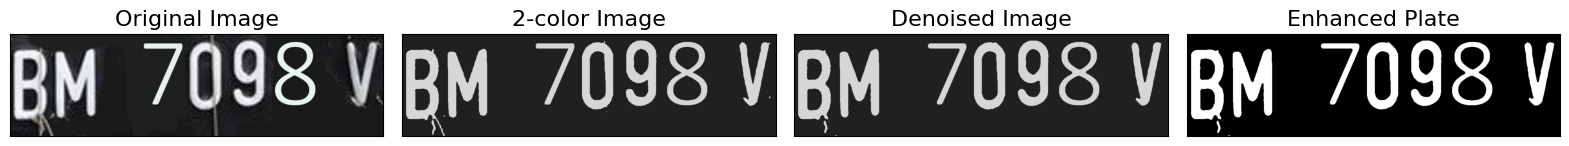

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


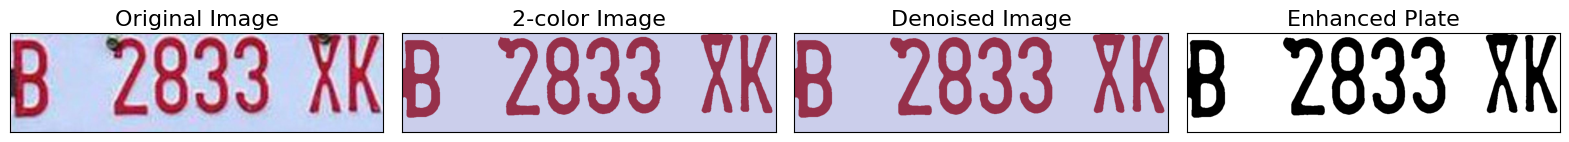

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


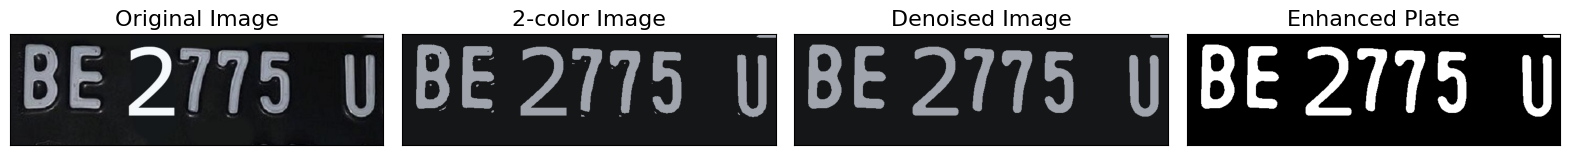

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


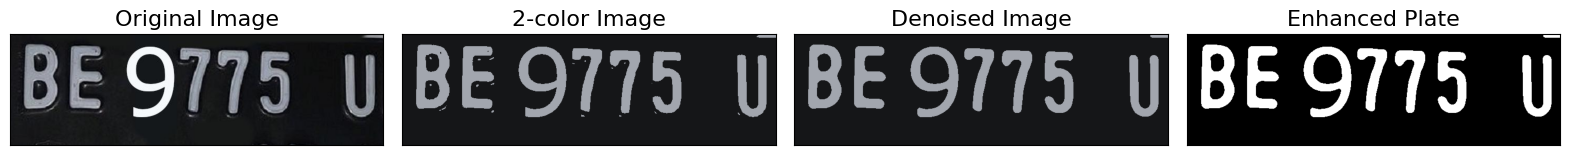

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


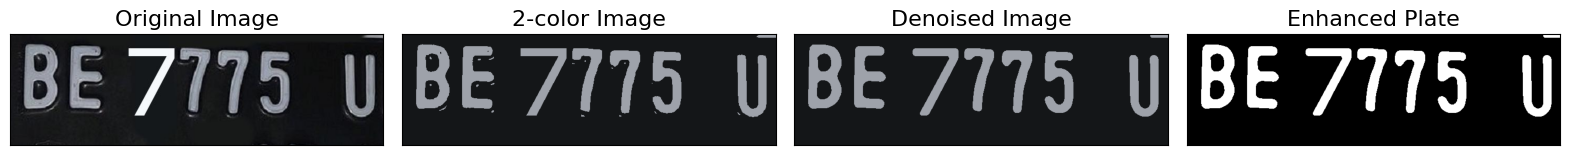

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Fungsi untuk menghilangkan noise
def remove_noise(image):
    return cv2.medianBlur(image, 9)

# Path ke folder yang berisi gambar
folder_path = 'zaky/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored)
    enhanced_plate = enhance_plate(denoised_image)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 4, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


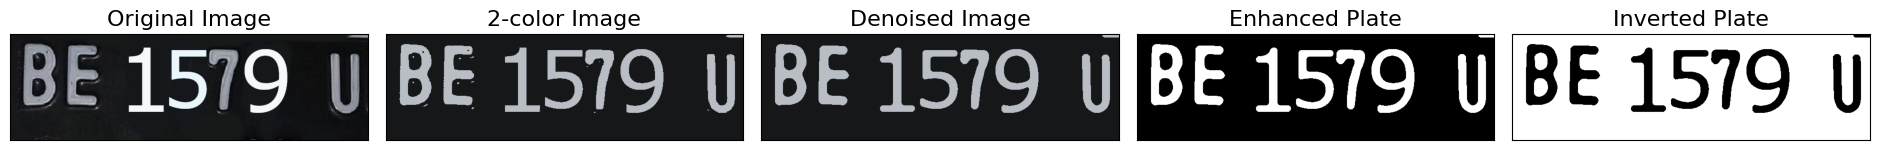

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


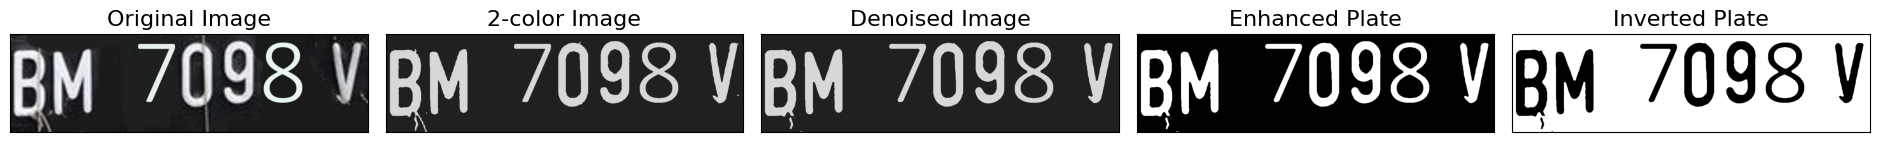

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


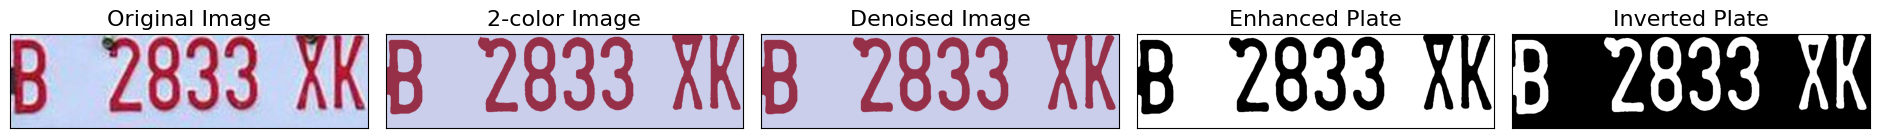

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


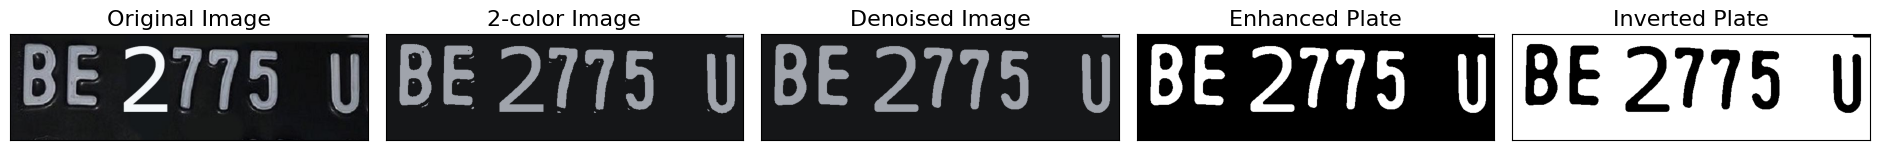

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


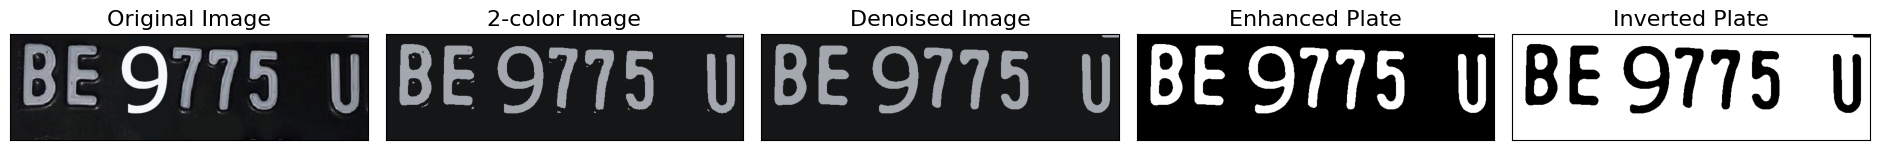

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


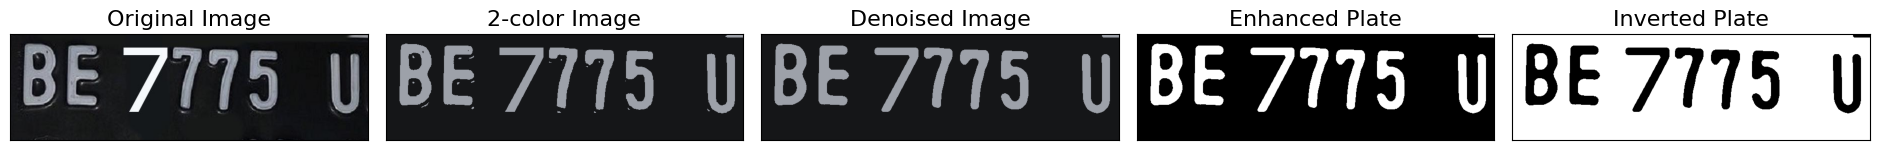

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Fungsi untuk menghilangkan noise dengan ukuran kernel yang disesuaikan
def remove_noise(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Path ke folder yang berisi gambar
folder_path = 'zaky/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)  # Melakukan inversi warna

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, hasil setelah inversi warna, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(24, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')  # Menampilkan hasil setelah inversi warna
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


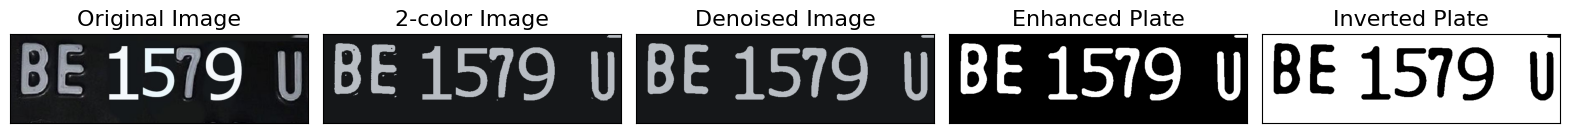

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


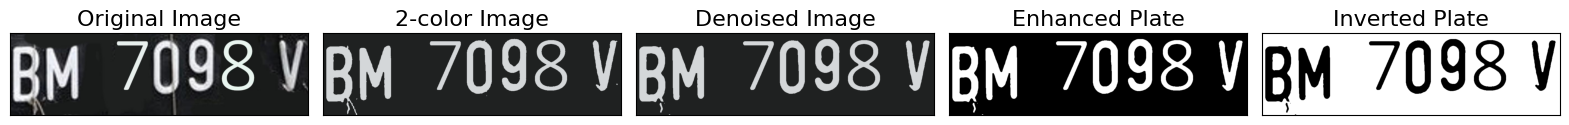

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


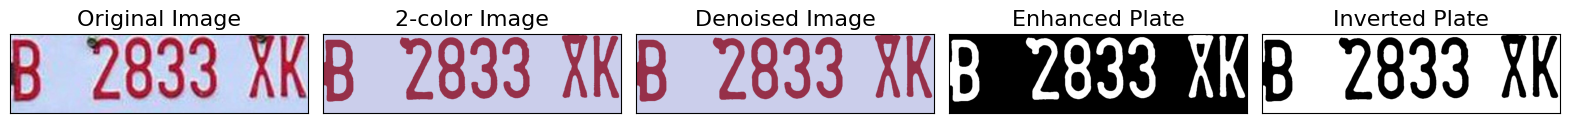

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


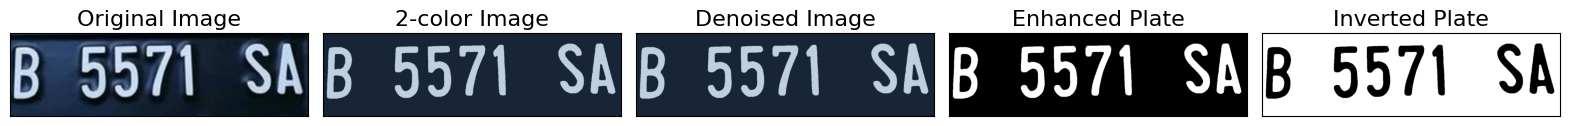

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


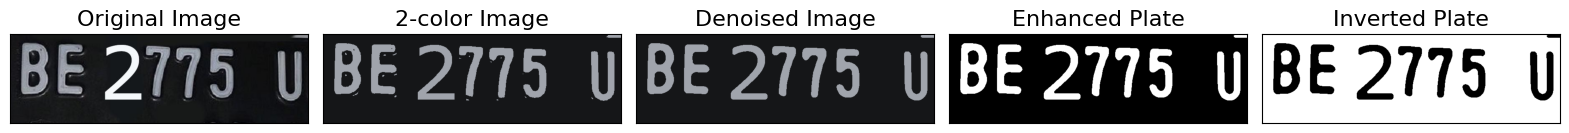

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


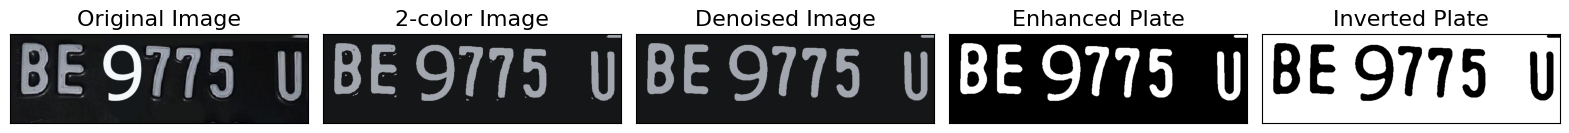

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


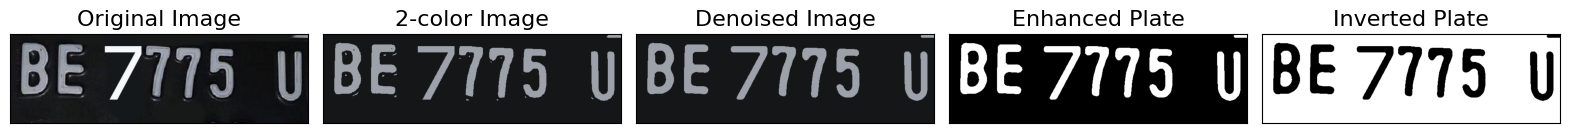

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat dengan logika if
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    if np.mean(thresh) > 128:  # Logika if untuk memastikan bahwa angka menjadi putih dan background menjadi hitam
        thresh = cv2.bitwise_not(thresh)

    return thresh

# Fungsi untuk menghilangkan noise dengan ukuran kernel yang disesuaikan
def remove_noise(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Path ke folder yang berisi gambar
folder_path = 'zaky/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)  # Melakukan inversi warna

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()


In [7]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,616 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


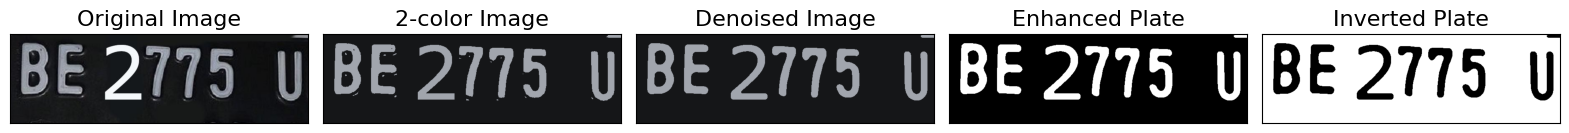

Hasil ekstraksi teks dari BE2775U_png.rf.1154baadf3d47887a53660553b91c183.jpg:
BE 2775 U



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


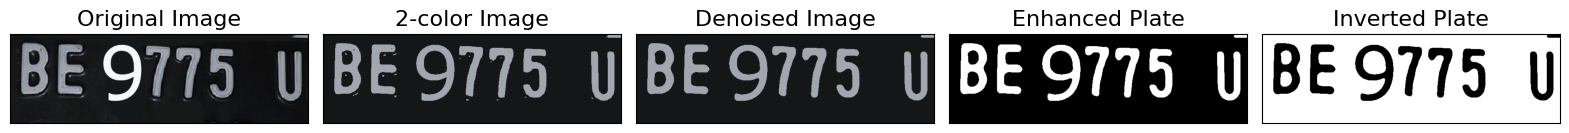

Hasil ekstraksi teks dari BE9775U_png.rf.2ae51db435580876c898c833edd0f774.jpg:
BE 9775 U



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


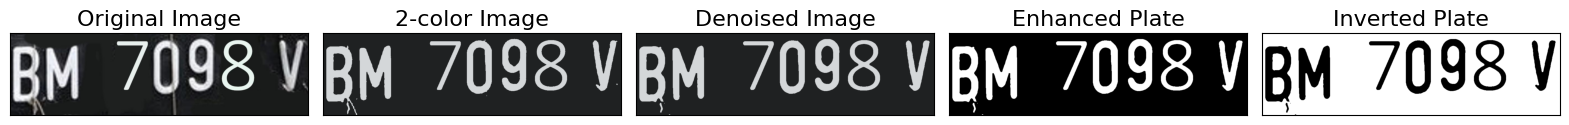

Hasil ekstraksi teks dari BM7098V_PNG.rf.f9bf79142de1caca7e3bf4a87b5958bf.jpg:
BM 7098 V



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


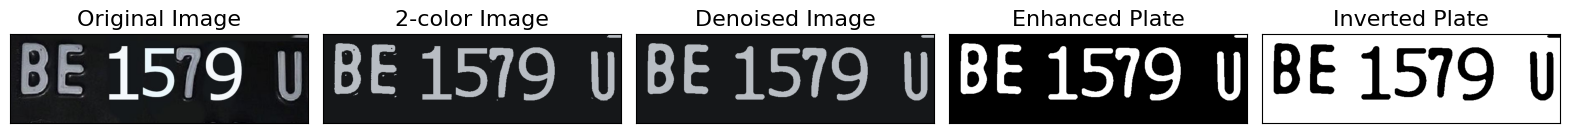

Hasil ekstraksi teks dari BE1579U_png.rf.1a50474a1018767eee1d936a7fa84bf1.jpg:
BE 1579 U



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


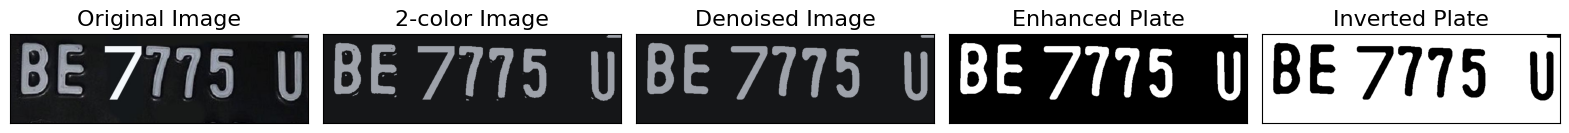

Hasil ekstraksi teks dari BE7775U_png.rf.ebc2eba876d15e533f1639a1805bc095.jpg:
BE 7775 U



In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat dengan logika if
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    if np.mean(thresh) > 128:  # Logika if untuk memastikan bahwa angka menjadi putih dan background menjadi hitam
        thresh = cv2.bitwise_not(thresh)

    return thresh

# Fungsi untuk menghilangkan noise dengan ukuran kernel yang disesuaikan
def remove_noise(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Fungsi untuk mengekstraksi teks dari gambar menggunakan pytesseract
def extract_text(image):
    return pytesseract.image_to_string(image)

# Path ke folder yang berisi gambar
folder_path = 'zaky/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)
    extracted_text = extract_text(inverted_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()
    print(f"Hasil ekstraksi teks dari {file_name}:")
    print(extracted_text)